<a href="https://colab.research.google.com/github/Anonymous-Mo/Mech-AI/blob/main/Pumpanomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow librosa numpy pandas scikit-learn


In [ ]:
import librosa
import numpy as np
import os

# Define a function to extract features from each file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return np.mean(mfccs.T, axis=0)

# Directory containing your audio files (adjust the path accordingly)
audio_directory = '/content/drive/MyDrive/pump/train'

# Get the list of all audio files in the directory
file_paths = [os.path.join(audio_directory, file) for file in os.listdir(audio_directory) if file.endswith('.wav')]

# Extract features for each file and store them in a list
features = []
for file_path in file_paths:
    mfcc_features = extract_features(file_path)
    features.append(mfcc_features)

# Convert the list to a NumPy array
features = np.array(features)

# Optionally, you can create labels (for supervised learning)
# Assuming labels are stored in a separate list or file, or you can generate random labels for testing
labels = np.random.random((len(features), 1))  # Example of random labels


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assume 'all_features' is a list containing the features from all audio files
# Optionally, 'all_labels' is a list containing the corresponding labels (if supervised learning)

# Convert lists to NumPy arrays
X = features

# If using labels (e.g., for supervised learning tasks)
# Ensure labels are also converted to a NumPy array
y = np.array(labels)

# Check shapes
print("Shape of input features (X):", X.shape)
print("Shape of labels (y):", y.shape)

# Get the number of input features (from one audio file)
input_shape = X.shape[1]  # This is the number of MFCC features or other extracted features

# Define the model architecture
def create_model(input_shape):
    model = Sequential()

    # Input layer
    model.add(Dense(128, activation='relu', input_shape=(input_shape,)))

    # Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))  # Dropout to prevent overfitting

    # Output layer for binary classification (adjust depending on your task)
    model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust loss for different tasks
    return model

# Create the model
model = create_model(input_shape)

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# Print model summary
model.summary()


Shape of input features (X): (3349, 13)
Shape of labels (y): (3349, 1)
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 4.5401 - val_accuracy: 0.0000e+00 - val_loss: 0.6979
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7002 - val_accuracy: 0.0000e+00 - val_loss: 0.6983
Epoch 3/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6951 - val_accuracy: 0.0000e+00 - val_loss: 0.6945
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6935
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6925 - val_accuracy: 0.0000e+00 - val_loss: 0.6939
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6922 - val_accuracy: 0.0000e+00 - val_loss: 0.6937
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,341 (118.52 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,228 (79.02 KB)

In [ ]:
import os
import numpy as np

# Directory containing your test wav files
test_data_dir = '/content/drive/MyDrive/pump/test'

# Function to load test data and extract features based on filename tags
def load_test_data_by_filename():
    X_test = []
    y_test = []

    # Iterate through the files in the directory
    for file_name in os.listdir(test_data_dir):
        file_path = os.path.join(test_data_dir, file_name)
        if file_path.endswith('.wav'):
            # Extract features using the previously defined extract_mfcc function
            mfcc_features = extract_features(file_path)
            X_test.append(mfcc_features)

            # Label the data based on the filename
            if 'normal' in file_name:
                y_test.append(0)  # Normal label
            elif 'anomaly' in file_name:
                y_test.append(1)  # Anomaly label

    return np.array(X_test), np.array(y_test)

# Load the test data and labels
X_test, y_test = load_test_data_by_filename()

print(f'Test feature shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')


Test feature shape: (856, 13)
Test labels shape: (856,)


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predict classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

print(f'Predicted labels: {y_pred_classes}')


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2059 - loss: 0.6914  
Test Loss: 0.6911942958831787, Test Accuracy: 0.4883177578449249
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted labels: [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
print(classification_report(y_test, y_pred_classes, target_names=['Normal', 'Anomaly']))


              precision    recall  f1-score   support

      Normal       0.48      0.99      0.64       400
     Anomaly       0.88      0.05      0.09       456

    accuracy                           0.49       856
   macro avg       0.68      0.52      0.37       856
weighted avg       0.69      0.49      0.35       856



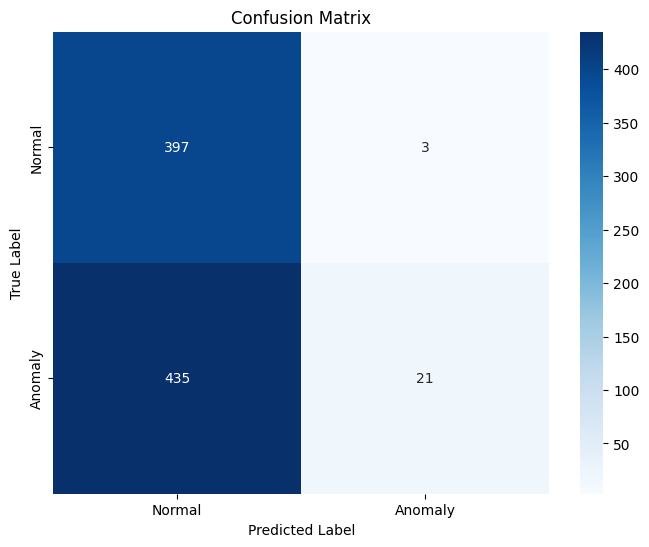

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix  # Import confusion_matrix here
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()